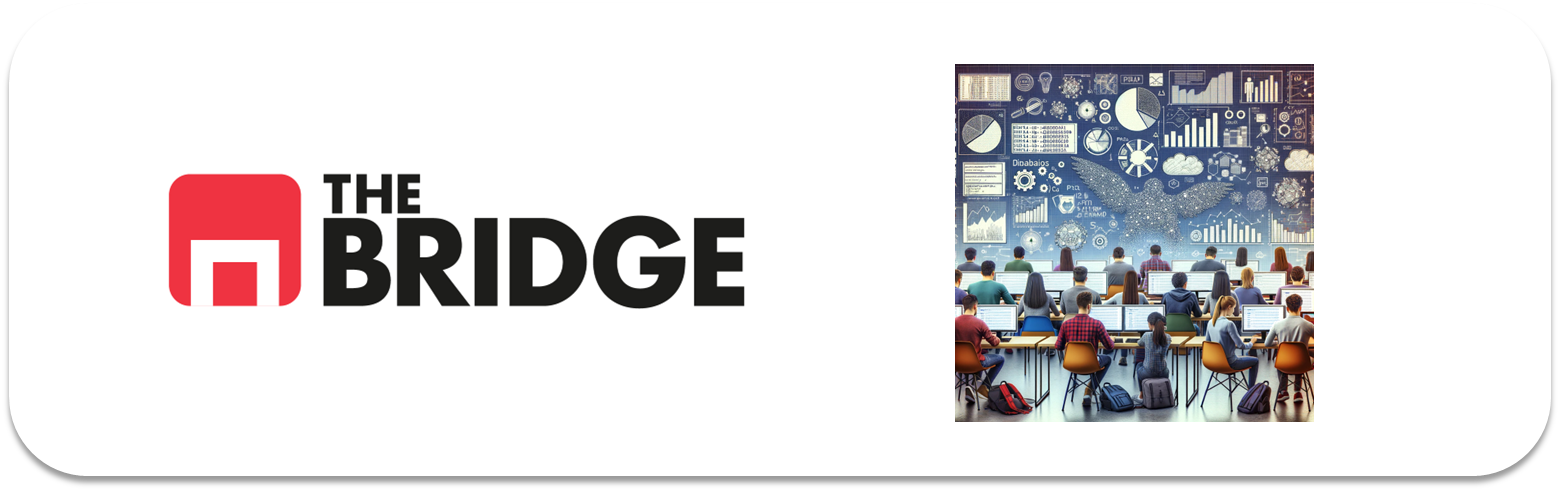

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [276]:
#Importacion de modulos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet


#### 1. Carga del dataset usando pandas

In [209]:
# Cargamos el dataset y mostramos su informacion general

dataset = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")

In [210]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [211]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [212]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### 2. Seleccion de la variable target

La variable target es "MEDV", que corresponde al precio medio de las viviendas y, por tanto, lo que queremos predecir

In [213]:
X = dataset.drop("MEDV", axis = 1)
y = dataset["MEDV"]

Viendo el histograma de la variable target ("MEDV"), parece seguir una distribución normal, aunque el ultimo bin muestra un gran pico de datos.   
Esto puede deberse a que los datos por encima de un determinado valor se han limitado, quedando agrupados en este último bin

[]

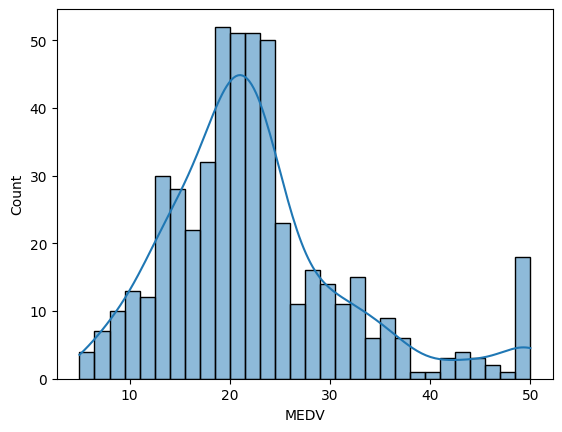

In [214]:
sns.histplot(data = y, bins = 30, kde=True)
plt.plot()

Parece estar sesgada a la derecha, pero el valor de kurtosis no es demasiado alto (< 2), por lo que es apta para el análisis

In [215]:
from scipy.stats import kurtosis
kurtosis(y)

np.float64(1.4686287722747462)

#### Puntos 3 a 6: Mini EDA, tratamiento de variables y creacion de sets de train y test

In [216]:
# Para eliminar este truncado de los datos que se observa en el histograma, vamos a eliminar los valores de la tabla cuando MEDV sea igual a 50
dataset[dataset["MEDV"] >= 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,7.44,50.0


In [217]:
dataset = dataset.drop(dataset[dataset["MEDV"] >= 50].index, axis = 0).reset_index(drop = True)

In [218]:
dataset[dataset["MEDV"] >= 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


[]

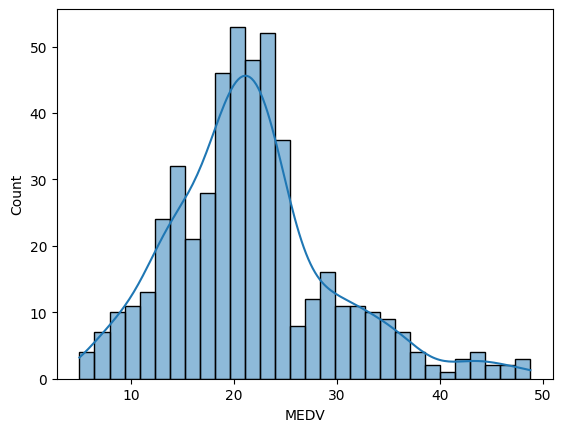

In [219]:
#Ahora, pasamos a ver de nuevo como queda el histograma:

sns.histplot(data = dataset["MEDV"], bins = 30, kde=True)
plt.plot()

<Axes: >

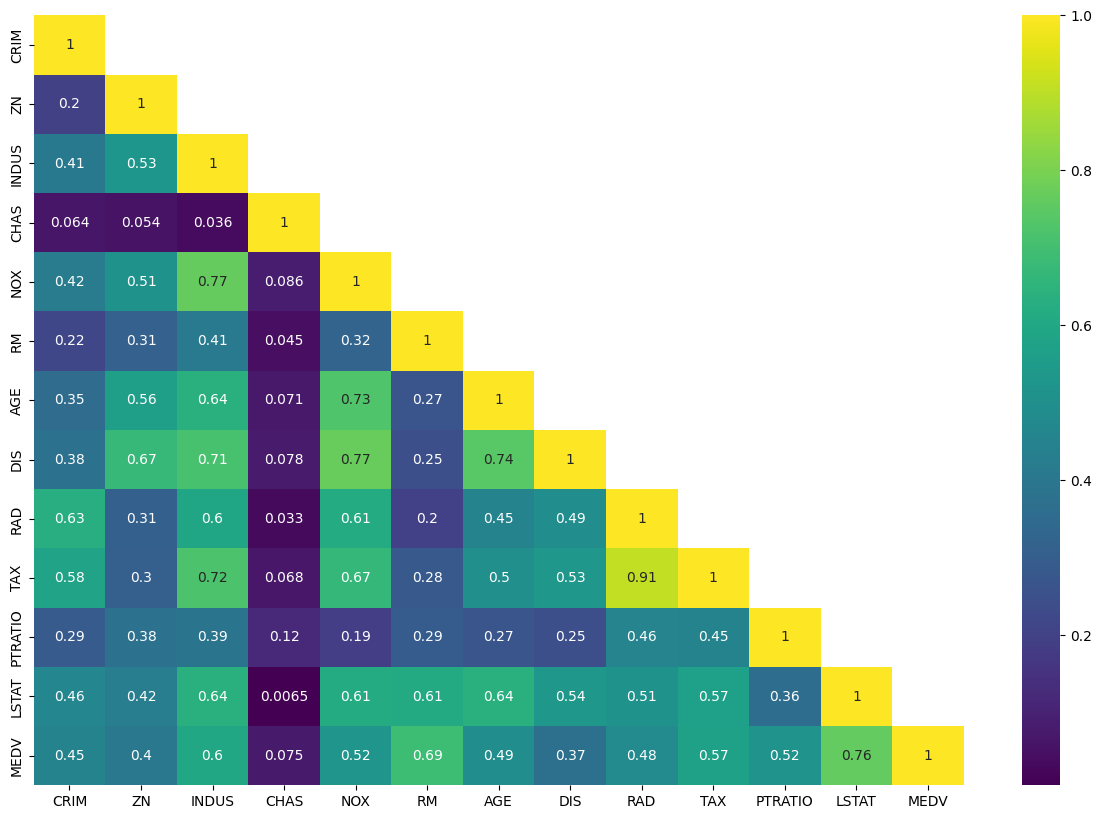

In [220]:
#Pasamos ahora a ver la correlacion entre las distintas variables
plt.figure(figsize=(15,10))
sns.heatmap(data =abs(dataset.corr()), cmap="viridis", annot=True, mask = np.triu(np.ones((13,13)), k = 1))

De lo anterior, vemos que:

- RAD y TAX estan correlacionadas al 91%. Mejor eliminar una. Quitamos RAD porque tiene menos correlación con MEDV
- DIS tiene muy poca correlación con MEDV y está muy correlacionada con otras variables. La eliminamos
- CHAS no está practicamente correlacionado con MEDV. La quitamos

Después veremos si eliminarlas favorece o perjudica al modelo antes de refinarlo

In [221]:
dataset = dataset.drop(["RAD", "DIS", "CHAS"], axis = 1)

<Axes: >

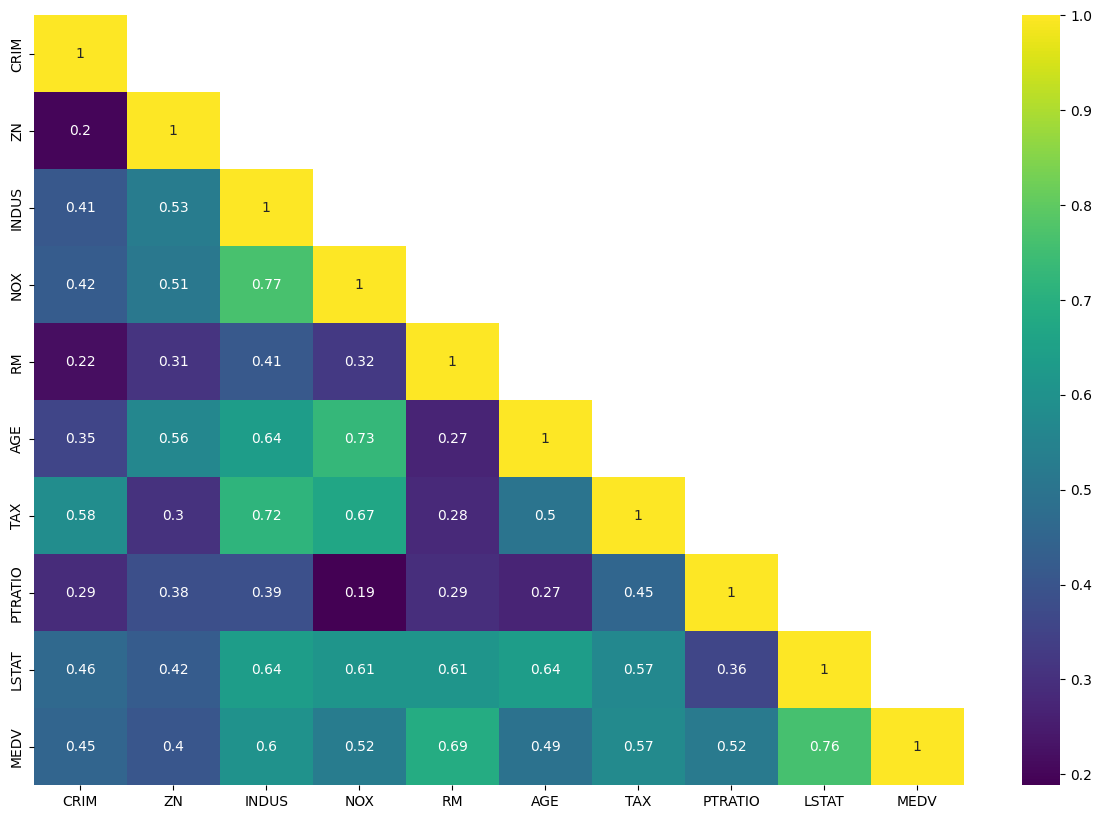

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(data =abs(dataset.corr()), cmap="viridis", annot=True, mask = np.triu(np.ones((10,10)), k = 1))

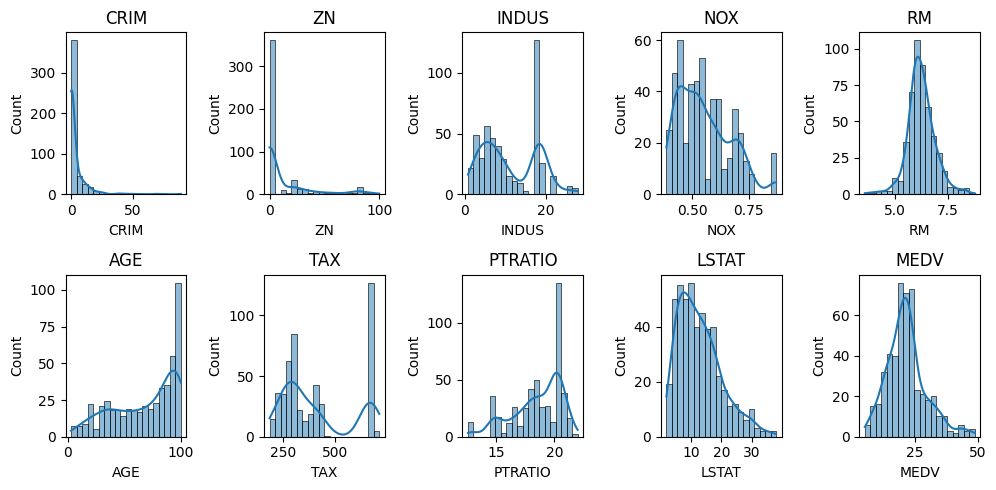

In [223]:
# Crear subgráficos
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Aplanar los ejes para iterar sobre ellos
axs = axs.flat

# Iterar sobre las variables del dataset y los ejes
for ax, variable in zip(axs, dataset.columns):
    sns.histplot(data=dataset[variable], kde=True, ax=ax, bins = 20)
    ax.set_title(variable)  # Opcional: agrega títulos a cada subplot

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

En la figura anterior se puede ver que la mayor parte de los datos siguen distribuciones normales, pero algunas variables no.   
Vamos a transformarlos usando el StandardScaler para que el modelo funcione mejor, pues suavizamos los outliers, lo cual es recomendable en una regresión lineal

In [224]:
X = dataset.drop("MEDV", axis = 1)
y = dataset["MEDV"]

In [225]:
scaler = StandardScaler()

X = scaler.fit_transform(X = X)

X = pd.DataFrame(data = X, columns = dataset.drop("MEDV", axis = 1).columns)

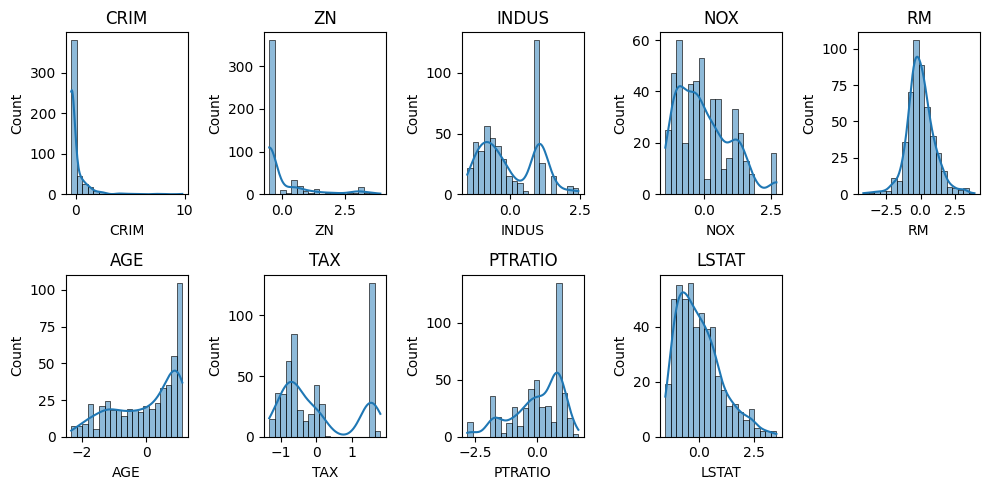

In [226]:
# Crear subgráficos
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

# Aplanar los ejes para iterar sobre ellos
axs = axs.flat

# Iterar sobre las variables del dataset y los ejes
for ax, variable in zip(axs, X.columns):
    sns.histplot(data=X[variable], kde=True, ax=ax, bins = 20)
    ax.set_title(variable)  # Opcional: agrega títulos a cada subplot

# Eliminar los subgráficos no utilizados si hay menos variables que subplots
for ax in axs[len(X.columns):]:
    ax.axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

In [227]:
#Creamos los test y train set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### 7. Construccion del modelo

In [228]:
lr = LinearRegression()
lr.fit(X = X_train, y = y_train)

LinearRegression()

In [229]:
lr_train_predict = lr.predict(X_train)
lr_test_predict = lr.predict(X_test)

In [230]:
print("Metricas para el TRAIN")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_train, y_pred=lr_train_predict))
print("Mean squared error:", mean_squared_error(y_true=y_train, y_pred=lr_train_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_train, y_pred=lr_train_predict))
print("R2 score:", r2_score(y_true=y_train, y_pred=lr_train_predict))

Metricas para el TRAIN
-------------------------------------
Mean absolute error: 3.0605744172414786
Mean squared error: 16.84886861449375
Root mean squared error: 4.104737338063637
R2 score: 0.7351958633390898


In [231]:
print("Metricas para el TEST")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_test, y_pred=lr_test_predict))
print("Mean squared error:", mean_squared_error(y_true=y_test, y_pred=lr_test_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_test, y_pred=lr_test_predict))
print("R2 score:", r2_score(y_true=y_test, y_pred=lr_test_predict))

Metricas para el TEST
-------------------------------------
Mean absolute error: 3.024932452294809
Mean squared error: 14.935510826168656
Root mean squared error: 3.8646488619496413
R2 score: 0.707636166966546


Antes de continuar, vamos a ver las métricas si no eliminamos las variables "RAD","DIS" y "CHAS"

In [250]:
dataset = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")
dataset = dataset.drop(dataset[dataset["MEDV"] >= 50].index, axis = 0).reset_index(drop = True)


X = dataset.drop("MEDV", axis = 1)
y = dataset["MEDV"]

scaler = StandardScaler()
X = scaler.fit_transform(X = X)
X = pd.DataFrame(data = X, columns = dataset.drop("MEDV", axis = 1).columns)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X = X_train, y = y_train)

lr_train_predict = lr.predict(X_train)
lr_test_predict = lr.predict(X_test)

In [251]:
print("Metricas para el TRAIN")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_train, y_pred=lr_train_predict))
print("Mean squared error:", mean_squared_error(y_true=y_train, y_pred=lr_train_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_train, y_pred=lr_train_predict))
print("R2 score:", r2_score(y_true=y_train, y_pred=lr_train_predict))

Metricas para el TRAIN
-------------------------------------
Mean absolute error: 2.864591144187138
Mean squared error: 14.637823254458667
Root mean squared error: 3.8259408325872823
R2 score: 0.7699456124812102


In [252]:
print("Metricas para el TEST")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_test, y_pred=lr_test_predict))
print("Mean squared error:", mean_squared_error(y_true=y_test, y_pred=lr_test_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_test, y_pred=lr_test_predict))
print("R2 score:", r2_score(y_true=y_test, y_pred=lr_test_predict))

Metricas para el TEST
-------------------------------------
Mean absolute error: 2.692062086352767
Mean squared error: 12.376490151213925
Root mean squared error: 3.518023614362747
R2 score: 0.7577292037598209


El modelo mejora si las dejamos en lugar de eliminarlas. Por lo tanto, vamos a proceder de esta manera

#### 8. Análisis de los pesos

In [246]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
CRIM,-1.236569
ZN,0.759866
INDUS,-0.376416
CHAS,0.058615
NOX,-1.393551
RM,2.309507
AGE,-0.544902
DIS,-2.567264
RAD,2.039009
TAX,-2.268935


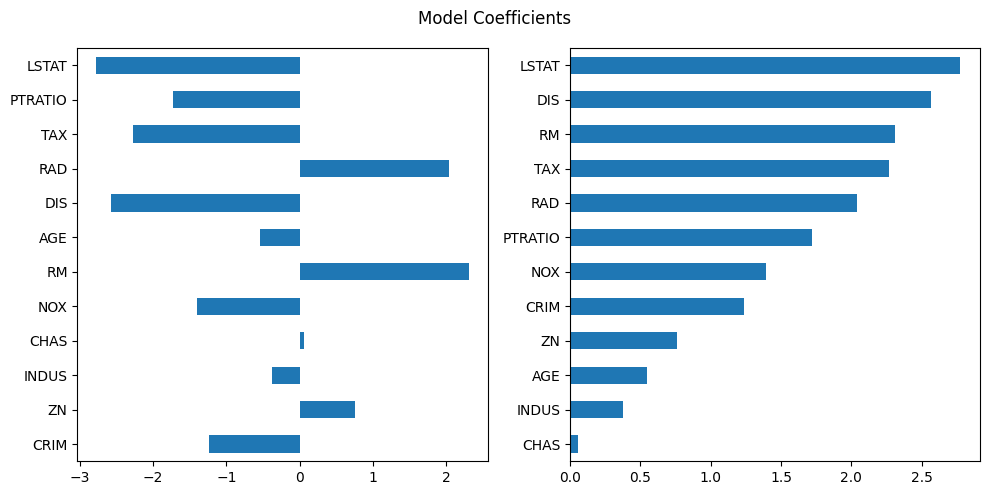

In [247]:
show_coefs(lr)

Aunque "CHAS" no tenga gran influencia, mejora ligeramente el modelo, por lo que vamos a dejarlo

#### 9. Evaluación del modelo

Vemos graficamente como se relacionan los valores reales frente a las predicciones.   
Parece calcular bien en valores centrales, pero comete más error en valores extremos   
En lo relativo a los errores, son muy parecidos en los datos de test y train, por lo que podemos decir que el modelo generaliza bien

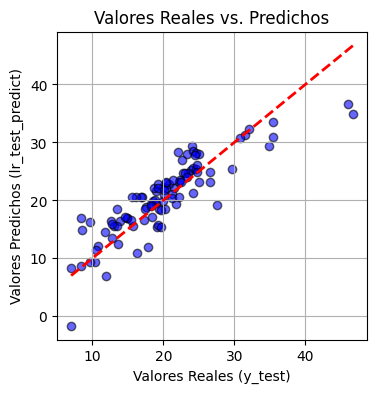

In [254]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, lr_test_predict, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title("Valores Reales vs. Predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (lr_test_predict)")
plt.grid(True)
plt.show()

#### 10. Regularizacion con modelos alternativos

Para este paso, vamos a usar elastic net, pues jugando con los hiperparámetros vamos a poder simular que usamos a la vez Ridge y Lasso

Se va a usar también GridSearchCV, pues permite encontrar los mejores parámetros entre los introducidos sin tener que probar manualmente varios intentos

In [297]:
parametros = {"alpha": [0,0.01,0.02,0.1,0.3,0.4,0.5,1],
              "l1_ratio" : [0,0.001,0.002,0.01,0.5,1]}

enet = GridSearchCV(estimator=ElasticNet(), param_grid=parametros)

enet.fit(X=X_train, y = y_train)
print(enet.best_params_)
print(enet.best_score_)

c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.096e+03, tolerance: 1.959e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

{'alpha': 0.02, 'l1_ratio': 0}
0.7433656752390585


c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.756e+03, tolerance: 1.993e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.856e+03, tolerance: 2.036e+00 Linear regression models with null weight for the l1 regularization term are more efficiently 

El warning que indica sale es debido a que el mejor estimador es el que considera l1_ratio = 0. Por lo que sería equivalente a Ridge.   
Pasamos a observar las métricas en la parte inferior

In [298]:
enet_train_predict = enet.predict(X_train)
enet_test_predict = enet.predict(X_test)

In [299]:
print("Metricas para el TRAIN")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_train, y_pred=enet_train_predict))
print("Mean squared error:", mean_squared_error(y_true=y_train, y_pred=enet_train_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_train, y_pred=enet_train_predict))
print("R2 score:", r2_score(y_true=y_train, y_pred=enet_train_predict))

Metricas para el TRAIN
-------------------------------------
Mean absolute error: 2.8641196770035657
Mean squared error: 14.69173394066614
Root mean squared error: 3.8329797730572674
R2 score: 0.7690983287231965


In [300]:
print("Metricas para el TEST")
print("-------------------------------------")
print("Mean absolute error:", mean_absolute_error(y_true = y_test, y_pred=enet_test_predict))
print("Mean squared error:", mean_squared_error(y_true=y_test, y_pred=enet_test_predict))
print("Root mean squared error:", root_mean_squared_error(y_true=y_test, y_pred=enet_test_predict))
print("R2 score:", r2_score(y_true=y_test, y_pred=enet_test_predict))

Metricas para el TEST
-------------------------------------
Mean absolute error: 2.696705517638607
Mean squared error: 12.44844669051561
Root mean squared error: 3.5282356342109025
R2 score: 0.7563206486801243


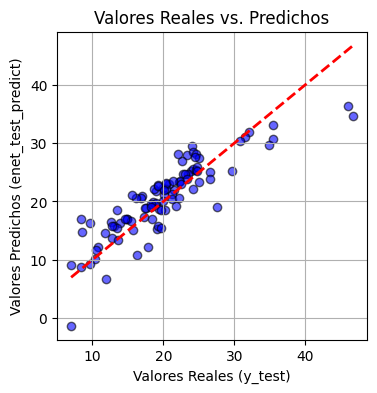

In [301]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, enet_test_predict, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title("Valores Reales vs. Predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (enet_test_predict)")
plt.grid(True)
plt.show()

,coefs
CRIM,-1.146810
ZN,0.645839
INDUS,-0.513905
CHAS,0.086181
NOX,-1.229280
RM,2.351093
AGE,-0.546908
DIS,-2.335989
RAD,1.511292
TAX,-1.767710


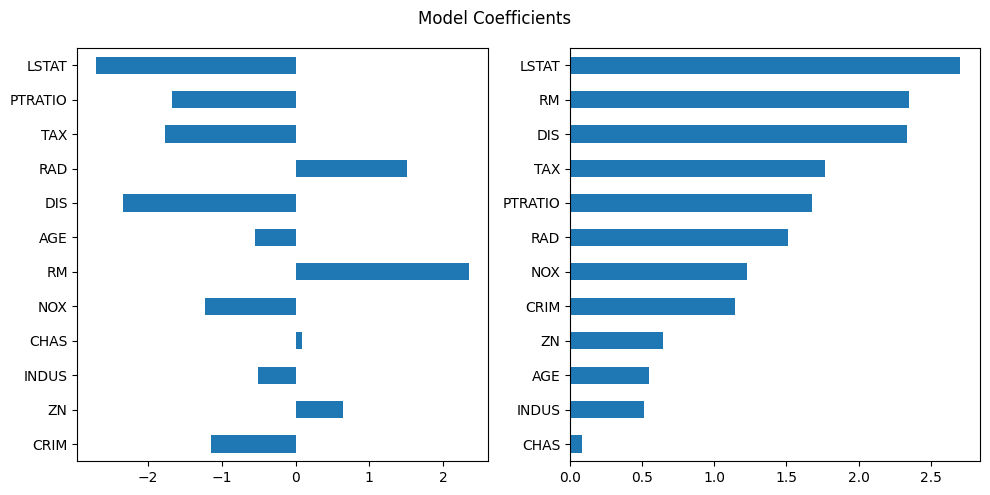

In [303]:
show_coefs(enet.best_estimator_)

#### 11. Conclusiones

En base a lo anterior, debido a los errores y al r2_score, se puede concluir con que el mejor estimador es directamente Linear Regression, sin necesidad de usar modelos de penalización como Rigde, Lasso o Elastic Net.   
Observando los resultados a nivel gráfico, se observa que el modelo es capaz de hacer un buen trabajo para datos centrales pero trabaja mal en los extemos, dando un mayor nivel de error estimando el valor de las viviendas que son o muy baratas o muy caras.